In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read the data set of "bank" in data.
data= pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042.0,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467.0,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389.0,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579.0,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673.0,2,-1,0,unknown,yes


In [4]:
data.drop('default', axis = 1, inplace = True)
data.drop('poutcome', axis = 1, inplace = True)


In [5]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042.0,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467.0,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389.0,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579.0,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673.0,2,-1,0,yes


In [6]:
# Checking the missing values
data.isnull().sum()

age          0
job          1
marital      0
education    1
balance      0
housing      1
loan         0
contact      1
day          0
month        0
duration     2
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [7]:
# Dropping the records with age missing in data dataframe.
data = data[~data.job.isnull()].copy()


# Checking the missing values in the dataset.
data.isnull().sum()

age          0
job          0
marital      0
education    1
balance      0
housing      1
loan         0
contact      1
day          0
month        0
duration     1
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [8]:
data = data[~data.education.isnull()].copy()
data = data[~data.housing.isnull()].copy()
data = data[~data.contact.isnull()].copy()
data = data[~data.duration.isnull()].copy()


data.isnull().sum()





age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

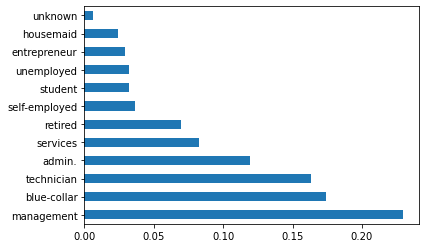

In [9]:
# Let's calculate the percentage of each job status category.
data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()

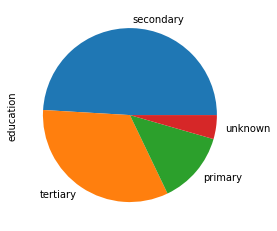

In [10]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [11]:
data.balance.describe()

count    11162.000000
mean      1528.398495
std       3225.443370
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

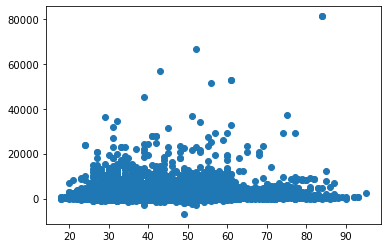

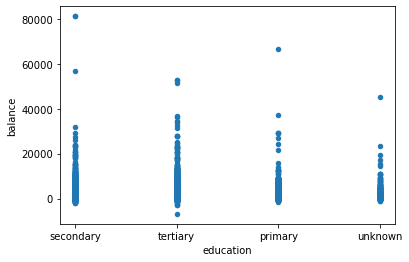

In [12]:
#plot the scatter plot of age and balance variable in data
plt.scatter(data.age,data.balance)
plt.show()

#plot the scatter plot of balance and education variable in data
data.plot.scatter(x="education",y="balance")
plt.show()

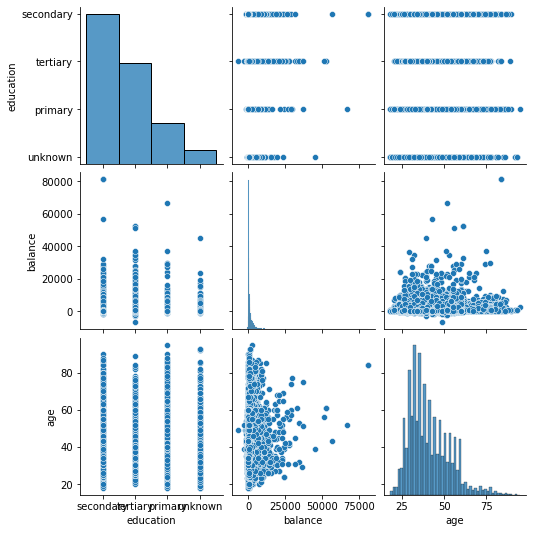

In [13]:
#plot the pair plot of education, balance and age in data dataframe.
sns.pairplot(data = data, vars=['education','balance','age'])
plt.show()

In [14]:
# Creating a matrix using age, duration, balance as rows and columns
data[['age', 'balance', 'duration']].corr()


,age,balance,duration
age,1.000000,0.112300,0.000191
balance,0.112300,1.000000,0.022346
duration,0.000191,0.022346,1.000000


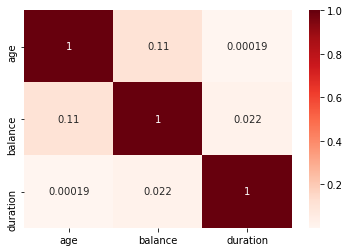

In [15]:
#plot the correlation matrix 
sns.heatmap(data[['age', 'balance', 'duration']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [16]:
#groupby the mean of the balance with regard to education level separately.
data.groupby('education')['balance'].mean()

education
primary      1522.967979
secondary    1296.253606
tertiary     1845.869070
unknown      1746.605634
Name: balance, dtype: float64

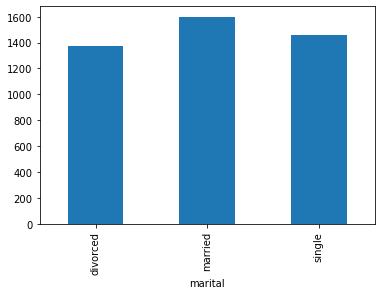

In [17]:
#plot the bar graph of marital status with balance average
data.groupby('marital')['balance'].mean().plot.bar()
plt.show()

marital       divorced      married       single
education                                       
primary    1415.764706  1568.636033  1378.479592
secondary  1006.457055  1442.182313  1139.859155
tertiary   1913.435233  1862.746066  1806.701370
unknown    1768.058824  1741.079585  1749.808917


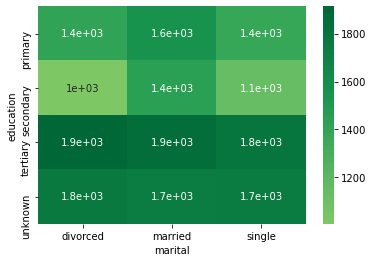

In [18]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='balance')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()